In [1]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import os
from PIL import Image, ImageDraw

In [2]:
def generate_random_points(n):
    arr = []
    for i in range(n):
        num1 = randint(1, 10)
        num2 = randint(1, 10)
        arr.append([num1, num2])
    return arr    

In [3]:
n = 10 # Number of points
# arr = generate_random_points(n)
# print(arr)

In [4]:
arr = [[10, 6], [8, 6], [5, 6], [7, 9], [1, 10], [2, 2], [9, 3], [3, 7], [6, 2], [4, 5]]

In [5]:
directory = "slowalgo/"

In [6]:
def checking_pairs(arr, small_arr, i, j):
    plt.scatter(*zip(*arr), color='blue')
    s = range(n+1)

    plt.xticks(s)
    plt.yticks(s)

    plt.xlim([0, n+1])
    plt.ylim([0, n+1])

    plt.plot(*zip(*small_arr), color='red')
    fname = str(directory + "im_" + str(i) + "_" + str(j) + "_1.jpg")
    plt.savefig(fname)

In [7]:
def check_right(arr, i, j):
    slope = (arr[i][1]-arr[j][1])/(arr[i][0]-arr[j][0])

    for v in range(n):
        if(v!=i and v!=j):
            value = arr[v][1] - arr[i][1] - slope*(arr[v][0] - arr[i][0])
            check = np.sign(value)
            break
    
    for v in range(n):
        if(v!=i and v!=j):
            value = arr[v][1] - arr[i][1] - slope*(arr[v][0] - arr[i][0])
            check_v = np.sign(value)
            if(check_v!=check): return 0
    return 1    

In [8]:
def add_pairs(arr, i, j):
    plt.scatter(*zip(*arr), color='blue')
    s = range(n+1)

    plt.xticks(s)
    plt.yticks(s)

    plt.xlim([0, n+1])
    plt.ylim([0, n+1])
    
    if(check_right(arr, i, j)):
        plt.plot(*zip(*[arr[i], arr[j]]), color='green')
        fname = str(directory + "im_" + str(i) + "_" + str(j) + "_2.jpg")
        plt.savefig(fname)

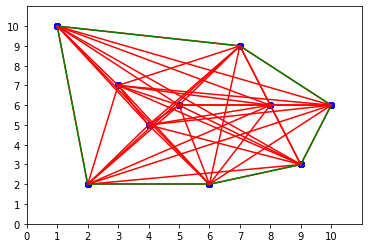

In [9]:
for i in range(n):
    for j in range(i+1, n):
        if(i!=j):
            checking_pairs(arr, [arr[i], arr[j]], i, j)
            add_pairs(arr, i, j)

In [10]:
frames = []
for image in sorted(os.listdir(directory)):
    frames.append(Image.open(directory + image))
frames[0].save(directory + 'output.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)